In [2]:
from IPython.display import Image, display


Displaying image: apple.jpg


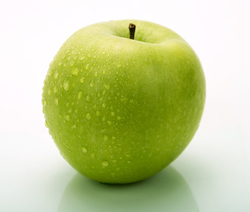


Displaying image: clock.jpg


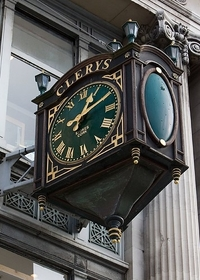


Displaying image: oranges.jpg


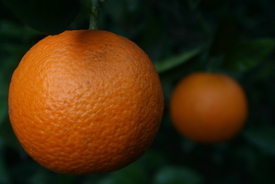


Displaying image: car.jpg


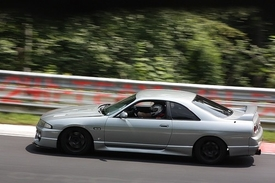

In [3]:
# Some example images
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"images/{image_file}"))

In [3]:
import os

dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [8]:
!pip install cvlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 KB 8.5 MB/s eta 0:00:000:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046384 sha256=8e4347a86c96fe21ed7ed499a8f8164967060a759cea4c50280eff79d611e3ed
  Stored in directory: /home/kiro/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=2db2f605993d4c107db42aa369aa3f9a606d956ffe8c20e3d7fd947a1d03b152
  Stored in directory: /home/kiro/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=120

In [10]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 12.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 12.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [15]:
!pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import os
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from IPython.display import Image, display

def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """
    Detects common objects in an image and saves a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Confidence level for detection. Defaults to 0.5.
    """
    # Define directories
    img_dir = 'images/'
    output_dir = 'images_with_boxes/'

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Full image file path
    img_filepath = os.path.join(img_dir, filename)

    # Check if the file exists
    if not os.path.isfile(img_filepath):
        print(f"Error: The file '{img_filepath}' does not exist.")
        return

    # Read the image
    img = cv2.imread(img_filepath)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Failed to load image '{img_filepath}'.")
        return

    # Temporarily disable progress bar to avoid the range error
    import cvlib.utils
    original_download_file = cvlib.utils.download_file
    cvlib.utils.download_file = lambda url, file_name, dest_dir: original_download_file(url, file_name, dest_dir, quiet=True)

    # Perform object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)

    # Print the current image's filename and detected objects
    print(f"========================\nImage processed: {filename}\n")
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c:.2f}\n")

    # Draw bounding boxes on the image
    output_image = draw_bbox(img, bbox, label, conf)

    # Save the image with bounding boxes
    output_filepath = os.path.join(output_dir, filename)
    cv2.imwrite(output_filepath, output_image)

    # Display the output image in Jupyter
    display(Image(output_filepath))

2024-10-11 10:02:29.559330: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-11 10:02:29.561974: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 10:02:29.599432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 10:02:29.600252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 10:02:30.724939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [19]:
!pip install cvlib
!pip install opencv-python



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


Image processed: apple.jpg

Detected object: apple with confidence level of 0.57



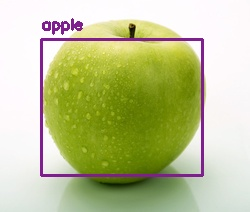

Image processed: clock.jpg

Detected object: clock with confidence level of 0.97



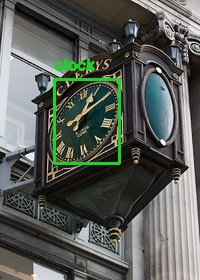

Image processed: oranges.jpg

Detected object: orange with confidence level of 0.62

Detected object: orange with confidence level of 0.56



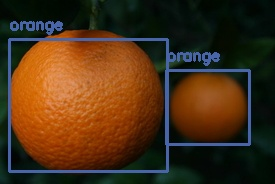

Image processed: car.jpg

Detected object: car with confidence level of 0.63



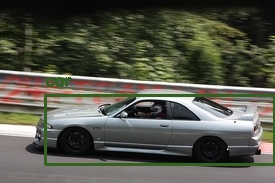

In [5]:
for image_file in image_files:
    detect_and_draw_box(image_file)

In [21]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.1.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
!jupyter kernelspec list

Available kernels:
  python3    /home/kiro/.local/share/jupyter/kernels/python3


In [24]:
pip uninstall tensorflow tensorflow-gpu cvlib numpy -y

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: cvlib 0.2.7
Uninstalling cvlib-0.2.7:
  Successfully uninstalled cvlib-0.2.7
Found existing installation: numpy 2.1.2
Uninstalling numpy-2.1.2:
  Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Clear pip cache
!pip cache purge

Files removed: 214


In [29]:
# Install packages in specific order
!pip install ipykernel numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install opencv-python
!pip install cvlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.8 MB/s eta 0:00:0031m13.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.5 MB/s eta 0:00:0031m13.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 11.3 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.6 MB/s 

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.58

Detected object: orange with confidence level of 0.53

Detected object: orange with confidence level of 0.52



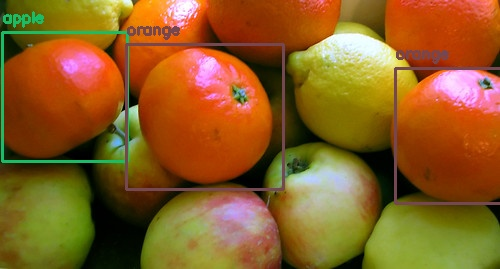

In [8]:
detect_and_draw_box("fruits.jpg")

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.58

Detected object: orange with confidence level of 0.53

Detected object: orange with confidence level of 0.52

Detected object: apple with confidence level of 0.35

Detected object: orange with confidence level of 0.33

Detected object: apple with confidence level of 0.31

Detected object: orange with confidence level of 0.28

Detected object: orange with confidence level of 0.27

Detected object: apple with confidence level of 0.27

Detected object: orange with confidence level of 0.21



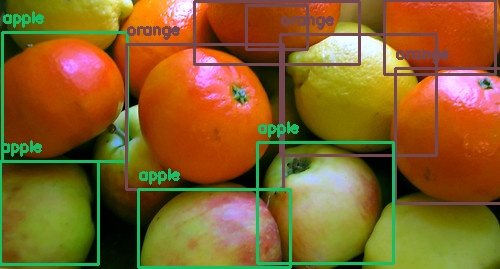

In [9]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

In [10]:
dir_name = "images_uploaded"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [11]:
!pip install uvicorn
!pip install nest_asyncio
!pip install aiofiles

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 3.8 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install fastapi

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 KB 1.9 MB/s eta 0:00:002.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 KB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00m eta 0:00:010:010:01


In [13]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [14]:
!pip install python-multipart

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from enum import Enum
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import io
import numpy as np
from fastapi.responses import StreamingResponse
import uvicorn
import nest_asyncio
import os

# Create FastAPI app instance
app = FastAPI(title='Deploying a ML Model with FastAPI')

# Define available models
class Model(str, Enum):
    yolov3tiny = "yolov3-tiny"
    yolov3 = "yolov3"

@app.get("/")
def home():
    return "Congratulations! Your API is working as expected. Now head over to http://localhost:8000/docs."

@app.post("/predict")
async def prediction(model: Model, file: UploadFile = File(...)):
    try:
        # 1. Validate input file
        filename = file.filename
        fileExtension = filename.split(".")[-1].lower() in ("jpg", "jpeg", "png")
        if not fileExtension:
            raise HTTPException(status_code=415, detail="Unsupported file provided.")

        # 2. Transform raw image into CV2 image
        # Read image as a stream of bytes
        image_stream = io.BytesIO(await file.read())
        
        # Start the stream from the beginning
        image_stream.seek(0)
        
        # Write the stream of bytes into a numpy array
        file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
        
        # Decode the numpy array as an image
        image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
        
        if image is None:
            raise HTTPException(status_code=400, detail="Invalid image file")

        # 3. Run object detection
        # Ensure the images_uploaded directory exists
        os.makedirs('images_uploaded', exist_ok=True)
        
        # Run object detection
        bbox, label, conf = cv.detect_common_objects(image, model=model.value)
        
        # Create image that includes bounding boxes and labels
        output_image = draw_bbox(image, bbox, label, conf)
        
        # Save it in a folder within the server
        output_path = os.path.join('images_uploaded', filename)
        cv2.imwrite(output_path, output_image)

        # 4. Stream the response back to the client
        def iterfile():
            with open(output_path, mode="rb") as file_like:
                yield from file_like

        return StreamingResponse(iterfile(), media_type="image/jpeg")

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [20]:
# Allows the server to be run in this interactive environment
nest_asyncio.apply()

# Host depends on the setup you selected (docker or virtual env)
host = "0.0.0.0" if os.getenv("DOCKER-SETUP") else "127.0.0.1"

# Spin up the server!    
uvicorn.run(app, host=host, port=8000)

INFO:     Started server process [6301]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:43670 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:45956 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:45956 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:45962 - "POST /predict?model=yolov3-tiny HTTP/1.1" 400 Bad Request


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [6301]


In [21]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse

app = FastAPI(title="File Upload Test API")

@app.post("/upload")
async def upload_file(file: UploadFile = File(...)):
    try:
        # Get file details
        file_details = {
            "filename": file.filename,
            "content_type": file.content_type,
            "file_size": len(await file.read())
        }
        
        return JSONResponse(content=file_details)
        
    except Exception as e:
        return JSONResponse(
            status_code=500,
            content={"error": str(e)}
        )

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [6301]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:38868 - "GET / HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [6301]


In [1]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import uvicorn
import nest_asyncio

# Allow the event loop to run inside Jupyter
nest_asyncio.apply()

# Create the FastAPI app
app = FastAPI(title="File Upload Test API")

@app.post("/upload")
async def upload_file(file: UploadFile = File(...)):
    try:
        # Read the file content
        file_content = await file.read()

        # Check if the file is an image (optional validation)
        if file.content_type.startswith("image/"):
            # Construct a success response
            response = {
                "success": True,
                "filename": file.filename,
            }
            return JSONResponse(content=response, status_code=200)
        else:
            # Handle non-image files
            return JSONResponse(
                status_code=400,
                content={"success": False, "error": "File is not an image"}
            )

    except Exception as e:
        # Handle server error
        return JSONResponse(
            status_code=500,
            content={"success": False, "error": str(e)}
        )

# Run the FastAPI app within the Jupyter notebook
uvicorn.run(app, host="127.0.0.1", port=8000)


INFO:     Started server process [12806]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:54776 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:54776 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:54776 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:54776 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:54776 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:54780 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:54780 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:55332 - "POST /upload HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [12806]
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/kiro/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/kiro/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/kiro/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/kiro/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import StreamingResponse, JSONResponse
import cv2
import numpy as np
import io
from enum import Enum
import nest_asyncio
import uvicorn
import cvlib as cv
from cvlib.object_detection import draw_bbox

# Allow the event loop to run inside Jupyter
nest_asyncio.apply()

# Create the FastAPI app
app = FastAPI(title="Deploying a ML Model with FastAPI")

# List available models using Enum
class Model(str, Enum):
    yolov3tiny = "yolov3-tiny"
    yolov3 = "yolov3"

# Define the home route
@app.get("/")
def home():
    return "Congratulations! Your API is working as expected. Now head over to http://localhost:8000/docs."

# Define the predict route
@app.post("/predict")
async def prediction(model: Model, file: UploadFile = File(...)):

    # 1. VALIDATE INPUT FILE
    filename = file.filename
    fileExtension = filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not fileExtension:
        raise HTTPException(status_code=415, detail="Unsupported file provided.")

    try:
        # 2. TRANSFORM RAW IMAGE INTO CV2 image

        # Read image as a stream of bytes
        image_stream = io.BytesIO(await file.read())

        # Start the stream from the beginning (position zero)
        image_stream.seek(0)

        # Write the stream of bytes into a numpy array
        file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)

        # Decode the numpy array as an image
        image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

        # 3. RUN OBJECT DETECTION MODEL
        bbox, label, conf = cv.detect_common_objects(image, model=model)

        # Draw bounding boxes and labels on the image
        output_image = draw_bbox(image, bbox, label, conf)

        # Save the output image in a folder within the server
        output_filename = f'images_uploaded/{filename}'
        cv2.imwrite(output_filename, output_image)

        # 4. STREAM THE RESPONSE BACK TO THE CLIENT

        # Open the saved image for reading in binary mode
        file_image = open(output_filename, mode="rb")

        # Return the image as a stream specifying media type
        return StreamingResponse(file_image, media_type="image/jpeg")

    except Exception as e:
        # Handle any processing errors
        return JSONResponse(
            status_code=500,
            content={"success": False, "error": str(e)}
        )

# Run the FastAPI app inside the Jupyter notebook
uvicorn.run(app, host="127.0.0.1", port=8000)


INFO:     Started server process [13592]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:57704 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:57714 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:57714 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:57718 - "POST /predict?model=yolov3-tiny HTTP/1.1" 200 OK
